# Read of L3 AIRS Data on H2O during One Year from Pandas
------------------------------------------------------------------

- author: Sylvie Dagoret-Campagne
- creation November 22 Novembre 2016
- update 24 november 2016 : generate latex table


### purpose:

Analyse AIRS instrument data from AQUA satellite for LSST air transparency simulation

- http://acdisc.gsfc.nasa.gov/data/Aqua_AIRS_Level3/AIRX3STM.006/

These data are provided by the Goddard Earth Science:

- http://disc.gsfc.nasa.gov/acdisc


## 1) python libraries
---------------------------

In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import datetime

In [3]:
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [4]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [5]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [6]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [7]:
import pyhdf

In [8]:
from pyhdf.SD import SD,SDC

In [9]:
import libAIRSL3Data as airs  # My own library

In [10]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

## 1)  Configuration
-------------------------

In [11]:
# where are the HDF files
# 9 month
#HDFEOS_ZOO_DIR="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/NASA_AIRS_AQUA_DATA/AIRH3STM/2016/h4" 
# 10 months
HDFEOS_ZOO_DIR="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/NASA_AIRS_AQUA_DATA/AIRS3STM/2016/h4"

In [12]:
path=HDFEOS_ZOO_DIR

In [13]:
# The selected data field
DATAFIELD_NAME =  'TotH2OVap_D'   # Select Ozone column Depth

In [14]:
DATAFIELD_UNIT = DATAFIELD_NAME+'(kg/m$^2$)'  # Unit

In [15]:
DATA_TITLE = 'PWV column depth measured by AIRS in 2016'  # Title in figures

In [16]:
pandas_filename='AIRS_2016_'+DATAFIELD_NAME+'.csv'
pandas_fieldname=['dates','average','ct','err','std','min','max']

In [17]:
figfilename1='AIRS2016_'+DATAFIELD_NAME+'.jpg'
figfilename2='AIRS2016_'+DATAFIELD_NAME+'pres'+'.jpg'

In [18]:
# Select observatory
loc=airs.observatory_location('ctio')

### 1.2) Getting the list of the files
------------------------------

In [19]:
dataset=pd.read_csv(pandas_filename)

In [20]:
dates_data=dataset[pandas_fieldname[0]]

In [21]:
for the_date in dates_data:
    the_year_str=the_date.split('-')[0]
    the_month_str=the_date.split('-')[1]
    print the_date,' ',the_year_str,' ',the_month_str 

2016-01-01   2016   01
2016-02-01   2016   02
2016-03-01   2016   03
2016-04-01   2016   04
2016-05-01   2016   05
2016-06-01   2016   06
2016-07-01   2016   07
2016-08-01   2016   08
2016-09-01   2016   09
2016-10-01   2016   10


## extract 

In [22]:

dates_data=dataset[pandas_fieldname[0]]
data_month_aver=dataset[pandas_fieldname[1]]
av=data_month_aver.mean()
data_month_sdev=dataset[pandas_fieldname[4]]
data_month_ct=dataset[pandas_fieldname[2]]
data_month_err=dataset[pandas_fieldname[3]]
data_month_p1std=data_month_aver+data_month_sdev
data_month_m1std=data_month_aver-data_month_sdev
data_month_min=dataset[pandas_fieldname[5]]
data_month_max=dataset[pandas_fieldname[6]]
NBFILES=dates_data.shape[0]

## 3) Plots

### Plot varation month to month

In [36]:
YMIN=0
YMAX=30

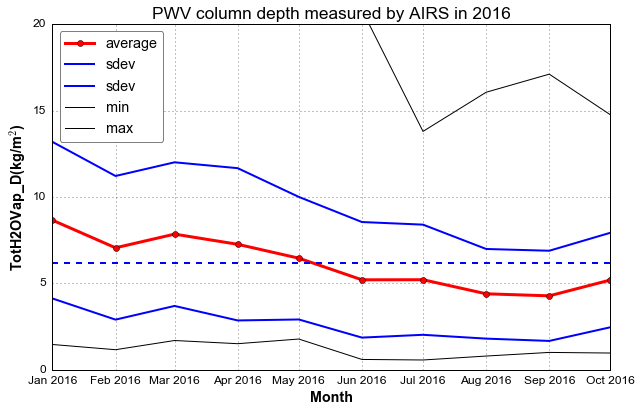

In [35]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)

ax.plot_date(dates_data, data_month_aver,'ro-',label='average',linewidth=3)
ax.plot_date(dates_data, data_month_p1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, data_month_m1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, data_month_min,'k-',label='min',linewidth=1)
ax.plot_date(dates_data, data_month_max,'k-',label='max',linewidth=1)


avline=np.ones(NBFILES)*av
ax.plot_date(dates_data, avline,'b--',linewidth=2)

ax.set_ylim(YMIN,YMAX)


ax.set_ylabel(DATAFIELD_UNIT)
ax.set_xlabel('Month')

ax.grid(True)


plt.title(DATA_TITLE)
plt.legend(loc='best')

plt.savefig(figfilename1, bbox_inches='tight')

### Plot relative error

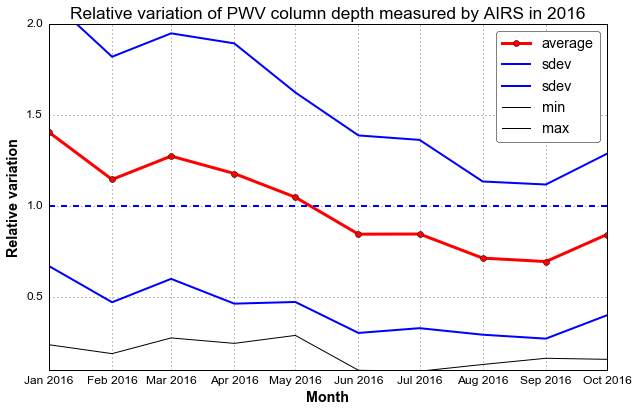

In [33]:

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)

ratio_data_month_aver=data_month_aver/av

ratio_data_month_p1std= data_month_p1std/av
ratio_data_month_m1std =data_month_m1std/av

ratio_data_month_min = data_month_min/av
ratio_data_month_max = data_month_max/av

ax.plot_date(dates_data, ratio_data_month_aver,'ro-',label='average',linewidth=3)
ax.plot_date(dates_data, ratio_data_month_p1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, ratio_data_month_m1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, ratio_data_month_min,'k-',label='min',linewidth=1)
ax.plot_date(dates_data, ratio_data_month_max,'k-',label='max',linewidth=1)


avline=np.ones(NBFILES)
ax.plot_date(dates_data, avline,'b--',linewidth=2)

ax.set_ylim(0.1,2)


ax.set_ylabel('Relative variation')
ax.set_xlabel('Month')

ax.grid(True)

title = 'Relative variation of '+ DATA_TITLE
plt.title(title)
plt.legend(loc='best')
plt.savefig(figfilename2, bbox_inches='tight')

In [26]:
dataset.to_latex()

u'\\begin{tabular}{lrrlrrrrr}\n\\toprule\n{} &  Unnamed: 0 &       std &       dates &       err &       min &        max &   average &   ct \\\\\n\\midrule\n0 &           0 &  4.531250 &  2016-01-01 &  1.445312 &  1.464844 &  22.859375 &  8.660156 &  697 \\\\\n1 &           1 &  4.156250 &  2016-02-01 &  1.164062 &  1.163086 &  21.578125 &  7.059570 &  656 \\\\\n2 &           2 &  4.156250 &  2016-03-01 &  1.226562 &  1.695312 &  21.125000 &  7.851562 &  696 \\\\\n3 &           3 &  4.406250 &  2016-04-01 &  1.226562 &  1.510742 &  24.968750 &  7.262207 &  565 \\\\\n4 &           4 &  3.546875 &  2016-05-01 &  1.312500 &  1.780273 &  23.187500 &  6.458984 &  620 \\\\\n5 &           5 &  3.343750 &  2016-06-01 &  1.023438 &  0.599609 &  20.828125 &  5.207520 &  573 \\\\\n6 &           6 &  3.187500 &  2016-07-01 &  1.132812 &  0.567871 &  13.796875 &  5.212891 &  457 \\\\\n7 &           7 &  2.593750 &  2016-08-01 &  0.906250 &  0.795898 &  16.062500 &  4.397949 &  665 \\\\\n8 &       

In [27]:
cols = list(dataset.columns.values)

In [28]:
cols

['Unnamed: 0', 'std', 'dates', 'err', 'min', 'max', 'average', 'ct']

In [29]:
newdataset=dataset[['dates','average','std','err','min','max','ct']]

In [30]:
newdataset

,dates,average,std,err,min,max,ct
0,2016-01-01,8.660156,4.531250,1.445312,1.464844,22.859375,697
1,2016-02-01,7.059570,4.156250,1.164062,1.163086,21.578125,656
2,2016-03-01,7.851562,4.156250,1.226562,1.695312,21.125000,696
3,2016-04-01,7.262207,4.406250,1.226562,1.510742,24.968750,565
4,2016-05-01,6.458984,3.546875,1.312500,1.780273,23.187500,620
5,2016-06-01,5.207520,3.343750,1.023438,0.599609,20.828125,573
6,2016-07-01,5.212891,3.187500,1.132812,0.567871,13.796875,457
7,2016-08-01,4.397949,2.593750,0.906250,0.795898,16.062500,665
8,2016-09-01,4.280273,2.609375,0.855469,1.005859,17.109375,589
9,2016-10-01,5.196289,2.734375,1.015625,0.970215,14.757812,630


In [31]:
newdataset.to_latex(index=False)

u'\\begin{tabular}{lrrrrrr}\n\\toprule\n      dates &   average &       std &       err &       min &        max &   ct \\\\\n\\midrule\n 2016-01-01 &  8.660156 &  4.531250 &  1.445312 &  1.464844 &  22.859375 &  697 \\\\\n 2016-02-01 &  7.059570 &  4.156250 &  1.164062 &  1.163086 &  21.578125 &  656 \\\\\n 2016-03-01 &  7.851562 &  4.156250 &  1.226562 &  1.695312 &  21.125000 &  696 \\\\\n 2016-04-01 &  7.262207 &  4.406250 &  1.226562 &  1.510742 &  24.968750 &  565 \\\\\n 2016-05-01 &  6.458984 &  3.546875 &  1.312500 &  1.780273 &  23.187500 &  620 \\\\\n 2016-06-01 &  5.207520 &  3.343750 &  1.023438 &  0.599609 &  20.828125 &  573 \\\\\n 2016-07-01 &  5.212891 &  3.187500 &  1.132812 &  0.567871 &  13.796875 &  457 \\\\\n 2016-08-01 &  4.397949 &  2.593750 &  0.906250 &  0.795898 &  16.062500 &  665 \\\\\n 2016-09-01 &  4.280273 &  2.609375 &  0.855469 &  1.005859 &  17.109375 &  589 \\\\\n 2016-10-01 &  5.196289 &  2.734375 &  1.015625 &  0.970215 &  14.757812 &  630 \\\\\n\\b

In [32]:
newdataset.describe()

,average,std,err,min,max,ct
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.158740,3.526562,1.130859,1.155371,19.627344,614.800000
std,1.512790,0.750110,0.183305,0.440208,3.885825,72.739719
min,4.280273,2.593750,0.855469,0.567871,13.796875,457.000000
25%,5.199097,2.847656,1.017578,0.839478,16.324219,577.000000
50%,5.835938,3.445312,1.148438,1.084473,20.976562,625.000000
75%,7.211548,4.156250,1.226562,1.499268,22.539062,662.750000
max,8.660156,4.531250,1.445312,1.780273,24.968750,697.000000
